In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available:  0
2.9.1


In [2]:
import pandas as pd   ## data analysis and manipulation
import numpy as np    ## numerial computing
import seaborn as sns ##  data visualization library based on matplotlib
import tensorflow.keras as keras ## main deep learning API

## additional functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import average_precision_score
from tensorflow.keras.utils import to_categorical

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from sklearn.utils import class_weight
import matplotlib.pyplot as plt

In [4]:
#load the data
df = pd.read_csv("/Users/a123456/Desktop/Fei's Project/Data/OCT_BASELINE_GRI__VF_6-3_FP-15_NO_PHI_CombinedProgression.csv")
df

,EID,PID,DOB,Eye,ImageID,Scan.Type,Diameter..mm.,Diameter....,Fixed.in.mm,ExamDate,...,VF_OCT_BASELINE_DIFF,VF_OCT_FINAL_DIFF,MD_BASELINE,MD_FINAL,VFI_BASELINE,VFI_FINAL,Y_GRI,Y_MD,Y_VFI,Y_combined
0,1,1,10/24/1949,LE,282596.0,OCT Circle Scan,3.7,12.0,0,5/11/2017,...,0.000000,3.561944,-2.15,-3.26,98,96,0,0,0,0
1,2,1,10/24/1949,RE,282593.0,OCT Circle Scan,3.7,12.0,0,5/11/2017,...,0.000000,3.561944,-7.73,-11.45,82,73,1,0,0,1
2,3,2,8/7/1939,LE,239514.0,OCT Circle Scan,3.4,12.0,0,8/26/2014,...,0.000000,6.151951,-1.28,-1.13,98,97,0,0,0,0
3,4,2,8/7/1939,RE,239512.0,OCT Circle Scan,3.4,12.0,0,8/26/2014,...,0.000000,6.151951,-0.72,0.60,98,99,0,0,0,0
4,5,3,5/20/1943,LE,238460.0,OCT Circle Scan,3.5,12.0,0,7/9/2014,...,0.024641,6.266940,-1.69,-0.51,99,99,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,580,329,3/22/1952,RE,837.0,OCT Circle Scan,3.7,12.0,0,5/5/2011,...,0.000000,9.601643,0.53,-2.51,98,93,1,0,0,1
580,581,330,5/15/1945,LE,243095.0,OCT Circle Scan,3.5,12.0,0,12/17/2014,...,0.000000,5.941136,-8.97,-14.71,78,56,1,1,1,1
581,582,330,5/15/1945,RE,243093.0,OCT Circle Scan,3.7,12.0,0,12/17/2014,...,0.000000,5.941136,-11.39,-11.37,70,67,1,0,0,1
582,583,331,5/31/1939,LE,109347.0,OCT Circle Scan,3.5,12.0,0,8/13/2013,...,0.172485,6.193018,-3.48,-19.28,97,51,1,1,1,1


In [5]:
#filter only circle scan data
circle_scan = (df['Scan.Type'] == 'OCT Circle Scan')
df = df[circle_scan]
df.shape

(580, 815)

In [6]:
df_raw = df

## 1. GRI combined

In [7]:
df = df_raw.iloc[:, np.r_[1, 28:797, 814]]
df

,PID,RNFLT.1,RNFLT.2,RNFLT.3,RNFLT.4,RNFLT.5,RNFLT.6,RNFLT.7,RNFLT.8,RNFLT.9,...,RNFLT.761,RNFLT.762,RNFLT.763,RNFLT.764,RNFLT.765,RNFLT.766,RNFLT.767,RNFLT.768,GRI,Y_combined
0,1,47.0,47.0,46.0,46.0,45.0,45.0,45.0,45.0,45.0,...,48.0,48.0,48.0,48.0,48.0,48.0,48.0,47.0,-3.688171,0
1,1,70.0,71.0,72.0,72.0,73.0,73.0,73.0,73.0,74.0,...,60.0,61.0,62.0,63.0,65.0,66.0,67.0,69.0,-6.827438,1
2,2,44.0,45.0,45.0,45.0,46.0,47.0,48.0,50.0,51.0,...,45.0,45.0,45.0,45.0,45.0,45.0,45.0,44.0,0.329429,0
3,2,44.0,44.0,44.0,45.0,45.0,46.0,46.0,47.0,47.0,...,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,0.581343,0
4,3,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,46.0,...,35.0,35.0,35.0,35.0,35.0,35.0,36.0,36.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,329,100.0,103.0,106.0,108.0,111.0,112.0,113.0,113.0,113.0,...,83.0,84.0,86.0,87.0,89.0,92.0,94.0,97.0,-11.691467,1
580,330,52.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,...,47.0,47.0,48.0,48.0,49.0,49.0,50.0,51.0,-19.908699,1
581,330,62.0,63.0,64.0,65.0,66.0,67.0,68.0,68.0,68.0,...,55.0,56.0,57.0,58.0,58.0,59.0,60.0,61.0,-10.130481,1
582,331,47.0,47.0,48.0,48.0,49.0,49.0,50.0,50.0,50.0,...,47.0,46.0,46.0,45.0,45.0,46.0,46.0,46.0,-24.731627,1


In [8]:
#drop missing values
df = df.dropna()
df.isnull().values.sum()
df.shape

(575, 771)

In [9]:
y = df.iloc[:, 770]
y

0      0
1      1
2      0
3      0
4      0
      ..
579    1
580    1
581    1
582    1
583    1
Name: Y_combined, Length: 575, dtype: int64

In [10]:
# https://github.com/applied-systems-biology/Dynamic_SPHARM/blob/master/SPHARM/classes/stratified_group_shuffle_split.py

from __future__ import print_function
from __future__ import division

from sklearn.utils.validation import check_array
from sklearn.model_selection import StratifiedShuffleSplit


class GroupShuffleSplitStratified(StratifiedShuffleSplit):

    def __init__(self, n_splits=5, test_size=2, train_size=None, random_state=None):

        super(GroupShuffleSplitStratified, self).__init__(
            n_splits=n_splits,
            test_size=test_size,
            train_size=train_size,
            random_state=random_state)

    def _iter_indices(self, X, y, groups):
        if groups is None:
            raise ValueError("The 'groups' parameter should not be None.")
        groups = check_array(groups, ensure_2d=False, dtype=None)
        groups_unique, group_indices = np.unique(groups, return_inverse=True)
        classes = []
        for gr in groups_unique:
            classes.append(y[np.where(groups==gr)[0][0]])

        for group_train, group_test in super(
                GroupShuffleSplitStratified, self)._iter_indices(X=groups_unique, y=classes):
            # these are the indices of classes in the partition
            # invert them into data indices

            train = np.flatnonzero(np.in1d(group_indices, group_train))
            test = np.flatnonzero(np.in1d(group_indices, group_test))

            yield train, test

    def split(self, X, y=None, groups=None):
        return super(GroupShuffleSplitStratified, self).split(X, y, groups)

In [11]:
train_i,test_i = next(GroupShuffleSplitStratified(n_splits=2, test_size=0.1,
                                        random_state=8).split(df,y, groups=df['PID']))
TrainVal = df.iloc[train_i]
TestSet = df.iloc[test_i]
print(TrainVal.shape)
print(TestSet.shape)

(516, 771)
(59, 771)


In [12]:
train_id,val_id = next(GroupShuffleSplitStratified(n_splits=2, test_size=0.1,
                                        random_state=8).split(TrainVal,y.iloc[train_i], groups=TrainVal['PID']))
TrainSet = TrainVal.iloc[train_id]
ValSet = TrainVal.iloc[val_id]
print(TrainSet.shape)
print(ValSet.shape)

(463, 771)
(53, 771)


In [13]:
x = df.iloc[test_i, 1:769]
print(x.isnull().values.sum())
print(x.shape)
x.head()

0
(59, 768)


,RNFLT.1,RNFLT.2,RNFLT.3,RNFLT.4,RNFLT.5,RNFLT.6,RNFLT.7,RNFLT.8,RNFLT.9,RNFLT.10,...,RNFLT.759,RNFLT.760,RNFLT.761,RNFLT.762,RNFLT.763,RNFLT.764,RNFLT.765,RNFLT.766,RNFLT.767,RNFLT.768
28,60.0,61.0,61.0,62.0,62.0,63.0,63.0,64.0,64.0,65.0,...,53.0,54.0,54.0,55.0,55.0,56.0,57.0,58.0,58.0,59.0
29,100.0,104.0,106.0,106.0,104.0,101.0,97.0,92.0,88.0,84.0,...,61.0,63.0,64.0,67.0,70.0,74.0,79.0,84.0,90.0,95.0
71,35.0,36.0,37.0,37.0,38.0,39.0,40.0,40.0,41.0,42.0,...,30.0,30.0,30.0,31.0,31.0,32.0,32.0,33.0,34.0,34.0
72,73.0,73.0,73.0,74.0,74.0,75.0,75.0,76.0,77.0,77.0,...,72.0,72.0,72.0,72.0,72.0,72.0,73.0,73.0,73.0,73.0
73,85.0,86.0,87.0,88.0,89.0,91.0,93.0,94.0,96.0,98.0,...,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0


In [14]:
x = np.asarray(x)
scaled_x = x/381
scaled_x = scaled_x.reshape(scaled_x.shape[0],scaled_x.shape[1],1)
X_test = scaled_x
print(X_test.shape)

(59, 768, 1)


In [15]:
x = TrainVal.iloc[train_id, 1:769]
x = np.asarray(x)
scaled_x = x/381
scaled_x = scaled_x.reshape(scaled_x.shape[0],scaled_x.shape[1],1)
X_train = scaled_x
print(X_train.shape)

(463, 768, 1)


In [16]:
x = TrainVal.iloc[val_id, 1:769]
x = np.asarray(x)
scaled_x = x/381
scaled_x = scaled_x.reshape(scaled_x.shape[0],scaled_x.shape[1],1)
X_val = scaled_x
print(X_val.shape)

(53, 768, 1)


In [17]:
#one-hot-encoding our label
y = pd.get_dummies(y)
print(y.value_counts())
y #The second column is 'progressor', The first column is 'non-progressor'

0  1
1  0    394
0  1    181
dtype: int64


,0,1
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
579,0,1
580,0,1
581,0,1
582,0,1


In [18]:
y = y.rename(columns={0: "Non-Progressor", 1: "Progressor"})
y

,Non-Progressor,Progressor
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
579,0,1
580,0,1
581,0,1
582,0,1


In [19]:
y_test = y.iloc[test_i]
y_test

,Non-Progressor,Progressor
28,1,0
29,1,0
71,0,1
72,0,1
73,0,1
96,0,1
97,1,0
122,1,0
123,0,1
152,1,0


In [20]:
y_train = y.iloc[train_i].iloc[train_id]
y_train

,Non-Progressor,Progressor
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
579,0,1
580,0,1
581,0,1
582,0,1


In [21]:
y_val = y.iloc[train_i].iloc[val_id]
y_val

,Non-Progressor,Progressor
12,0,1
32,1,0
33,1,0
40,0,1
49,0,1
50,1,0
102,0,1
126,1,0
127,1,0
128,0,1


In [22]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.value_counts(), '\n')
print(y_val.value_counts(), '\n')
print(y_test.value_counts())

(463, 768, 1)
(59, 768, 1)
(53, 768, 1)
Non-Progressor  Progressor
1               0             321
0               1             142
dtype: int64 

Non-Progressor  Progressor
1               0             35
0               1             18
dtype: int64 

Non-Progressor  Progressor
1               0             38
0               1             21
dtype: int64


### 1.1 No resampling

#### 1.1.1 Original model

In [24]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=400,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
opt1 = keras.optimizers.Adam(learning_rate = 1e-4)

In [37]:
#create model1
model_111 = Sequential()

#add layers
model_111.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(768,1)))
model_111.add(MaxPooling1D(pool_size=3))
# model_1.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model_111.add(Dropout(0.5))
# model_1.add(MaxPooling1D(pool_size=2))
model_111.add(Flatten())
model_111.add(Dense(64, activation='relu'))
model_111.add(Dense(16, activation='relu'))
model_111.add(Dense(2, activation='softmax'))
model_111.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 766, 64)           256       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 255, 64)          0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 255, 64)           0         
                                                                 
 flatten_2 (Flatten)         (None, 16320)             0         
                                                                 
 dense_5 (Dense)             (None, 64)                1044544   
                                                                 
 dense_6 (Dense)             (None, 16)                1040      
                                                      

In [38]:
model_111.compile(optimizer=opt1, 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
#Here we use cross-entropy as the criteria for loss.
model_111.fit(X_train, y_train, 
            validation_data=(X_val, y_val), 
            epochs=500, verbose=True, 
            callbacks=[early_stopping_monitor])

Epoch 1/500
15/15 [==============================] - 1s 40ms/step - loss: 0.6152 - accuracy: 0.6803 - val_loss: 0.6440 - val_accuracy: 0.6604
Epoch 2/500
15/15 [==============================] - 0s 25ms/step - loss: 0.6098 - accuracy: 0.6933 - val_loss: 0.6165 - val_accuracy: 0.6604
Epoch 3/500
15/15 [==============================] - 0s 25ms/step - loss: 0.6038 - accuracy: 0.6933 - val_loss: 0.6204 - val_accuracy: 0.6604
Epoch 4/500
15/15 [==============================] - 0s 25ms/step - loss: 0.6003 - accuracy: 0.6933 - val_loss: 0.6116 - val_accuracy: 0.6604
Epoch 5/500
15/15 [==============================] - 0s 26ms/step - loss: 0.5993 - accuracy: 0.6933 - val_loss: 0.6123 - val_accuracy: 0.6604
Epoch 6/500
15/15 [==============================] - 0s 25ms/step - loss: 0.5953 - accuracy: 0.6933 - val_loss: 0.6075 - val_accuracy: 0.6604
Epoch 7/500
15/15 [==============================] - 0s 25ms/step - loss: 0.5976 - accuracy: 0.6933 - val_loss: 0.6067 - val_accuracy: 0.6604
Epoch 

15/15 [==============================] - 0s 24ms/step - loss: 0.5202 - accuracy: 0.7624 - val_loss: 0.5912 - val_accuracy: 0.6038
Epoch 59/500
15/15 [==============================] - 0s 27ms/step - loss: 0.5266 - accuracy: 0.7775 - val_loss: 0.5924 - val_accuracy: 0.6226
Epoch 60/500
15/15 [==============================] - 0s 24ms/step - loss: 0.5132 - accuracy: 0.7667 - val_loss: 0.5916 - val_accuracy: 0.5849
Epoch 61/500
15/15 [==============================] - 0s 24ms/step - loss: 0.5146 - accuracy: 0.7667 - val_loss: 0.5934 - val_accuracy: 0.6038
Epoch 62/500
15/15 [==============================] - 0s 22ms/step - loss: 0.5127 - accuracy: 0.7797 - val_loss: 0.5900 - val_accuracy: 0.6415
Epoch 63/500
15/15 [==============================] - 0s 25ms/step - loss: 0.5176 - accuracy: 0.7603 - val_loss: 0.5937 - val_accuracy: 0.6038
Epoch 64/500
15/15 [==============================] - 0s 23ms/step - loss: 0.5173 - accuracy: 0.7732 - val_loss: 0.5960 - val_accuracy: 0.6415
Epoch 65/500

15/15 [==============================] - 0s 25ms/step - loss: 0.4357 - accuracy: 0.8121 - val_loss: 0.6396 - val_accuracy: 0.6415
Epoch 116/500
15/15 [==============================] - 0s 24ms/step - loss: 0.4390 - accuracy: 0.8056 - val_loss: 0.6412 - val_accuracy: 0.6226
Epoch 117/500
15/15 [==============================] - 0s 26ms/step - loss: 0.4405 - accuracy: 0.8207 - val_loss: 0.6438 - val_accuracy: 0.6226
Epoch 118/500
15/15 [==============================] - 0s 24ms/step - loss: 0.4325 - accuracy: 0.8164 - val_loss: 0.6456 - val_accuracy: 0.6415
Epoch 119/500
15/15 [==============================] - 0s 26ms/step - loss: 0.4405 - accuracy: 0.8164 - val_loss: 0.6455 - val_accuracy: 0.6226
Epoch 120/500
15/15 [==============================] - 0s 25ms/step - loss: 0.4341 - accuracy: 0.8207 - val_loss: 0.6458 - val_accuracy: 0.6415
Epoch 121/500
15/15 [==============================] - 0s 26ms/step - loss: 0.4467 - accuracy: 0.8099 - val_loss: 0.6444 - val_accuracy: 0.6792
Epoch 

**For test set:**

In [39]:
m1_eval_test = model_111.evaluate(X_test, y_test)
m1_eval_val = model_111.evaluate(X_val, y_val)

2/2 [==============================] - 0s 4ms/step - loss: 0.5839 - accuracy: 0.6981


In [40]:
pred = model_111.predict(X_test)
roc_value = roc_auc_score(y_test, pred)
ap_score = average_precision_score(y_test, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 7ms/step
roc auc score:  0.7393483709273183
average precision score:  0.7548260536253177


In [41]:
y_pred = pred
y_c = (y_pred > 0.5).astype("int32")
y_test_np = y_test.to_numpy()
y_test_np = y_test_np.astype('int32')

2/2 [==============================] - 0s 7ms/step - loss: 0.5662 - accuracy: 0.7288


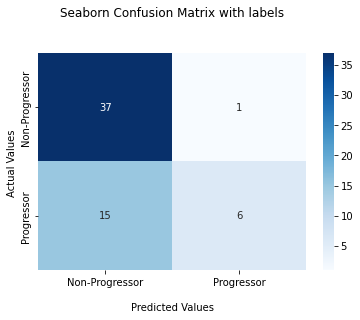

In [42]:
cf_matrix = confusion_matrix(y_test_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Progressor','Progressor'])
ax.yaxis.set_ticklabels(['Non-Progressor','Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m1_eval_test = model_111.evaluate(X_test, y_test)
plt.show()

**For validation set:**

In [43]:
pred = model_111.predict(X_val)
roc_value = roc_auc_score(y_val, pred)
ap_score = average_precision_score(y_val, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 7ms/step
roc auc score:  0.7031746031746031
average precision score:  0.6759629560349194


In [44]:
y_pred = pred
y_c = (y_pred > 0.5).astype("int32")
y_val_np = y_val.to_numpy()
y_val_np = y_val_np.astype('int32')

2/2 [==============================] - 0s 4ms/step - loss: 0.5839 - accuracy: 0.6981


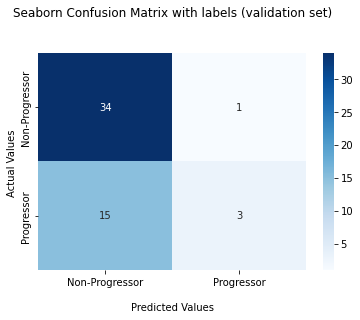

In [45]:
cf_matrix = confusion_matrix(y_val_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels (validation set)\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Progressor','Progressor'])
ax.yaxis.set_ticklabels(['Non-Progressor','Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m1_eval_test = model_111.evaluate(X_val, y_val)
plt.show()

#### 1.1.2 Alvin's model

In [55]:
#create model1
model_112 = Sequential()

#add layers
model_112.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(768,1)))
model_112.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model_112.add(Flatten())
model_112.add(Dense(112, activation='relu'))
model_112.add(Dense(2, activation='softmax'))
model_112.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 766, 64)           256       
                                                                 
 conv1d_9 (Conv1D)           (None, 764, 32)           6176      
                                                                 
 flatten_5 (Flatten)         (None, 24448)             0         
                                                                 
 dense_12 (Dense)            (None, 112)               2738288   
                                                                 
 dense_13 (Dense)            (None, 2)                 226       
                                                                 
Total params: 2,744,946
Trainable params: 2,744,946
Non-trainable params: 0
_________________________________________________________________


In [56]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=400,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
opt1 = keras.optimizers.Adam(learning_rate = 1e-4)

In [57]:
model_112.compile(optimizer=opt1, 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
#Here we use cross-entropy as the criteria for loss.
model_112.fit(X_train, y_train, 
            validation_data=(X_val, y_val), 
            epochs=500, verbose=True, 
            callbacks=[early_stopping_monitor])

Epoch 1/500
15/15 [==============================] - 1s 42ms/step - loss: 0.6344 - accuracy: 0.6631 - val_loss: 0.6316 - val_accuracy: 0.6604
Epoch 2/500
15/15 [==============================] - 0s 32ms/step - loss: 0.6071 - accuracy: 0.6933 - val_loss: 0.6200 - val_accuracy: 0.6604
Epoch 3/500
15/15 [==============================] - 0s 33ms/step - loss: 0.6052 - accuracy: 0.6933 - val_loss: 0.6175 - val_accuracy: 0.6604
Epoch 4/500
15/15 [==============================] - 0s 32ms/step - loss: 0.6034 - accuracy: 0.6933 - val_loss: 0.6184 - val_accuracy: 0.6604
Epoch 5/500
15/15 [==============================] - 0s 33ms/step - loss: 0.6010 - accuracy: 0.6933 - val_loss: 0.6144 - val_accuracy: 0.6604
Epoch 6/500
15/15 [==============================] - 0s 33ms/step - loss: 0.5988 - accuracy: 0.6933 - val_loss: 0.6122 - val_accuracy: 0.6604
Epoch 7/500
15/15 [==============================] - 0s 33ms/step - loss: 0.5989 - accuracy: 0.6933 - val_loss: 0.6093 - val_accuracy: 0.6604
Epoch 

15/15 [==============================] - 0s 33ms/step - loss: 0.3988 - accuracy: 0.8251 - val_loss: 0.6731 - val_accuracy: 0.6604
Epoch 59/500
15/15 [==============================] - 0s 33ms/step - loss: 0.3967 - accuracy: 0.8251 - val_loss: 0.6844 - val_accuracy: 0.6792
Epoch 60/500
15/15 [==============================] - 0s 33ms/step - loss: 0.4043 - accuracy: 0.8402 - val_loss: 0.7129 - val_accuracy: 0.6604
Epoch 61/500
15/15 [==============================] - 0s 33ms/step - loss: 0.3899 - accuracy: 0.8251 - val_loss: 0.6824 - val_accuracy: 0.6604
Epoch 62/500
15/15 [==============================] - 0s 32ms/step - loss: 0.3832 - accuracy: 0.8423 - val_loss: 0.7134 - val_accuracy: 0.6415
Epoch 63/500
15/15 [==============================] - 0s 32ms/step - loss: 0.3926 - accuracy: 0.8315 - val_loss: 0.7088 - val_accuracy: 0.6415
Epoch 64/500
15/15 [==============================] - 0s 33ms/step - loss: 0.3856 - accuracy: 0.8488 - val_loss: 0.7008 - val_accuracy: 0.6604
Epoch 65/500

15/15 [==============================] - 1s 35ms/step - loss: 0.1733 - accuracy: 0.9525 - val_loss: 1.0471 - val_accuracy: 0.5849
Epoch 116/500
15/15 [==============================] - 1s 34ms/step - loss: 0.1683 - accuracy: 0.9590 - val_loss: 1.0474 - val_accuracy: 0.5849
Epoch 117/500
15/15 [==============================] - 0s 32ms/step - loss: 0.1592 - accuracy: 0.9525 - val_loss: 1.0460 - val_accuracy: 0.5660
Epoch 118/500
15/15 [==============================] - 1s 34ms/step - loss: 0.1622 - accuracy: 0.9525 - val_loss: 1.0959 - val_accuracy: 0.5660
Epoch 119/500
15/15 [==============================] - 0s 33ms/step - loss: 0.1580 - accuracy: 0.9546 - val_loss: 1.0883 - val_accuracy: 0.5660
Epoch 120/500
15/15 [==============================] - 1s 37ms/step - loss: 0.1571 - accuracy: 0.9546 - val_loss: 1.0656 - val_accuracy: 0.5660
Epoch 121/500
15/15 [==============================] - 1s 34ms/step - loss: 0.1536 - accuracy: 0.9460 - val_loss: 1.0905 - val_accuracy: 0.5472
Epoch 

Epoch 172/500
15/15 [==============================] - 1s 38ms/step - loss: 0.0454 - accuracy: 0.9914 - val_loss: 1.6506 - val_accuracy: 0.6038
Epoch 173/500
15/15 [==============================] - 0s 32ms/step - loss: 0.0492 - accuracy: 0.9892 - val_loss: 1.6400 - val_accuracy: 0.6226
Epoch 174/500
15/15 [==============================] - 0s 32ms/step - loss: 0.0519 - accuracy: 0.9892 - val_loss: 1.6586 - val_accuracy: 0.6226
Epoch 175/500
15/15 [==============================] - 0s 32ms/step - loss: 0.0441 - accuracy: 0.9914 - val_loss: 1.6633 - val_accuracy: 0.6038
Epoch 176/500
15/15 [==============================] - 0s 33ms/step - loss: 0.0417 - accuracy: 0.9935 - val_loss: 1.6763 - val_accuracy: 0.6038
Epoch 177/500
15/15 [==============================] - 0s 32ms/step - loss: 0.0408 - accuracy: 0.9957 - val_loss: 1.6680 - val_accuracy: 0.5849
Epoch 178/500
15/15 [==============================] - 0s 33ms/step - loss: 0.0417 - accuracy: 0.9957 - val_loss: 1.6828 - val_accuracy:

Epoch 229/500
15/15 [==============================] - 0s 31ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 2.1537 - val_accuracy: 0.6415
Epoch 230/500
15/15 [==============================] - 0s 32ms/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 2.1787 - val_accuracy: 0.5849
Epoch 231/500
15/15 [==============================] - 0s 32ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 2.1465 - val_accuracy: 0.6226
Epoch 232/500
15/15 [==============================] - 1s 38ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 2.1614 - val_accuracy: 0.6226
Epoch 233/500
15/15 [==============================] - 1s 36ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 2.1706 - val_accuracy: 0.6604
Epoch 234/500
15/15 [==============================] - 0s 32ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 2.1852 - val_accuracy: 0.6226
Epoch 235/500
15/15 [==============================] - 0s 33ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 2.1762 - val_accuracy:

Epoch 286/500
15/15 [==============================] - 1s 36ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 2.5764 - val_accuracy: 0.6226
Epoch 287/500
15/15 [==============================] - 1s 37ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 2.5743 - val_accuracy: 0.6415
Epoch 288/500
15/15 [==============================] - 1s 34ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 2.5817 - val_accuracy: 0.6415
Epoch 289/500
15/15 [==============================] - 1s 36ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 2.5719 - val_accuracy: 0.6415
Epoch 290/500
15/15 [==============================] - 0s 33ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 2.5923 - val_accuracy: 0.6226
Epoch 291/500
15/15 [==============================] - 1s 35ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 2.5979 - val_accuracy: 0.6226
Epoch 292/500
15/15 [==============================] - 1s 38ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 2.6065 - val_accuracy:

Epoch 343/500
15/15 [==============================] - 0s 34ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 2.9147 - val_accuracy: 0.6415
Epoch 344/500
15/15 [==============================] - 1s 36ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.9162 - val_accuracy: 0.6415
Epoch 345/500
15/15 [==============================] - 1s 36ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.9436 - val_accuracy: 0.6415
Epoch 346/500
15/15 [==============================] - 1s 35ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 2.9401 - val_accuracy: 0.6415
Epoch 347/500
15/15 [==============================] - 0s 32ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 2.9399 - val_accuracy: 0.6226
Epoch 348/500
15/15 [==============================] - 0s 31ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.9497 - val_accuracy: 0.6415
Epoch 349/500
15/15 [==============================] - 0s 31ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.9495 - val_accuracy:

Epoch 399/500
15/15 [==============================] - 1s 35ms/step - loss: 5.9335e-04 - accuracy: 1.0000 - val_loss: 3.2077 - val_accuracy: 0.6226
Epoch 400/500
15/15 [==============================] - 1s 35ms/step - loss: 5.9142e-04 - accuracy: 1.0000 - val_loss: 3.2113 - val_accuracy: 0.6415
Epoch 401/500
15/15 [==============================] - 1s 35ms/step - loss: 5.9199e-04 - accuracy: 1.0000 - val_loss: 3.2160 - val_accuracy: 0.6226
Epoch 402/500
15/15 [==============================] - 0s 33ms/step - loss: 5.7087e-04 - accuracy: 1.0000 - val_loss: 3.2172 - val_accuracy: 0.6415
Epoch 403/500
15/15 [==============================] - 1s 39ms/step - loss: 5.8957e-04 - accuracy: 1.0000 - val_loss: 3.2176 - val_accuracy: 0.6415
Epoch 404/500
15/15 [==============================] - 1s 36ms/step - loss: 5.6549e-04 - accuracy: 1.0000 - val_loss: 3.2330 - val_accuracy: 0.6226
Epoch 405/500
15/15 [==============================] - 1s 36ms/step - loss: 5.7819e-04 - accuracy: 1.0000 - val_

**For test set:**

In [58]:
m1_eval_test = model_112.evaluate(X_test, y_test)
m1_eval_val = model_112.evaluate(X_val, y_val)

2/2 [==============================] - 0s 13ms/step - loss: 0.6203 - accuracy: 0.7170


In [59]:
pred = model_112.predict(X_test)
roc_value = roc_auc_score(y_test, pred)
ap_score = average_precision_score(y_test, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 9ms/step
roc auc score:  0.736842105263158
average precision score:  0.7303067765821403


In [60]:
y_pred = pred
y_c = (y_pred > 0.5).astype("int32")
y_test_np = y_test.to_numpy()
y_test_np = y_test_np.astype('int32')

In [61]:
pred

array([[0.8747175 , 0.12528254],
       [0.8180357 , 0.18196426],
       [0.7914583 , 0.20854168],
       [0.38320255, 0.61679745],
       [0.6376152 , 0.36238477],
       [0.36459407, 0.6354059 ],
       [0.596154  , 0.40384603],
       [0.8739808 , 0.12601914],
       [0.4501728 , 0.5498272 ],
       [0.89649385, 0.10350617],
       [0.8158654 , 0.18413465],
       [0.8779641 , 0.12203592],
       [0.6723586 , 0.32764137],
       [0.7823606 , 0.21763942],
       [0.69707394, 0.30292606],
       [0.8950943 , 0.10490567],
       [0.834851  , 0.16514897],
       [0.8385638 , 0.16143626],
       [0.50402296, 0.4959771 ],
       [0.85551715, 0.14448285],
       [0.92478365, 0.07521634],
       [0.6203529 , 0.3796471 ],
       [0.38867217, 0.6113278 ],
       [0.93074137, 0.06925862],
       [0.82283235, 0.1771676 ],
       [0.8066713 , 0.19332868],
       [0.81851715, 0.18148287],
       [0.7501101 , 0.2498899 ],
       [0.8147028 , 0.18529713],
       [0.40159294, 0.5984071 ],
       [0.

2/2 [==============================] - 0s 9ms/step - loss: 0.6041 - accuracy: 0.7458


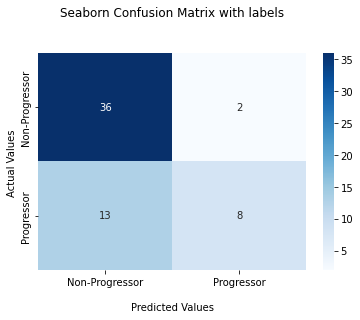

In [62]:
cf_matrix = confusion_matrix(y_test_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Progressor','Progressor'])
ax.yaxis.set_ticklabels(['Non-Progressor','Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m1_eval_test = model_112.evaluate(X_test, y_test)
plt.show()

**For validation set:**

In [63]:
pred = model_112.predict(X_val)
roc_value = roc_auc_score(y_val, pred)
ap_score = average_precision_score(y_val, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 9ms/step
roc auc score:  0.6857142857142857
average precision score:  0.649773989842593


In [64]:
y_pred = pred
y_c = (y_pred > 0.5).astype("int32")
y_val_np = y_val.to_numpy()
y_val_np = y_val_np.astype('int32')

2/2 [==============================] - 0s 8ms/step - loss: 0.6203 - accuracy: 0.7170


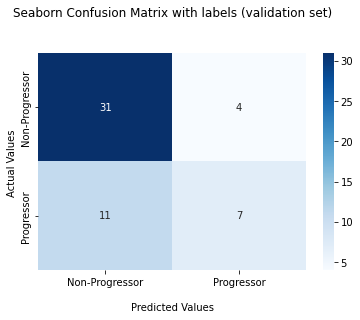

In [65]:
cf_matrix = confusion_matrix(y_val_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels (validation set)\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Progressor','Progressor'])
ax.yaxis.set_ticklabels(['Non-Progressor','Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m1_eval_test = model_112.evaluate(X_val, y_val)
plt.show()

**Model saving:**

In [66]:
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense
import os

In [67]:
# serialize model to JSON
model_111_json = model_111.to_json()
with open("model_111.json", "w") as json_file:
    json_file.write(model_111_json)
# serialize weights to HDF5
model_111.save_weights("model_111.h5")
print("Saved model to disk")

Saved model to disk


In [68]:
# serialize model to JSON
model_112_json = model_112.to_json()
with open("model_112.json", "w") as json_file:
    json_file.write(model_112_json)
# serialize weights to HDF5
model_112.save_weights("model_112.h5")
print("Saved model to disk")

Saved model to disk


### 1.2 With resampling

In [69]:
y_progressor = np.array(y_train)[:,1]
y_progressor

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,

In [70]:
len(y_progressor)

463

In [71]:
X_train.shape

(463, 768, 1)

In [72]:
X_train_2d = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
X_train_2d.shape

(463, 768)

In [73]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy = 'minority')
X_train_over, y_train_over = oversample.fit_resample(X_train_2d, y_progressor)
print(X_train_over.shape)
y_train_over

(642, 768)


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,

In [74]:
y_train_over = pd.get_dummies(y_train_over)
y_train_over

,0,1
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
637,0,1
638,0,1
639,0,1
640,0,1


In [75]:
y_train_over=y_train_over.rename(columns={0: "Non-Progressor", 1: "Progressor"})
print(y_train_over.value_counts(), '\n')

Non-Progressor  Progressor
0               1             321
1               0             321
dtype: int64 



In [76]:
print(y_train.value_counts(), '\n')

Non-Progressor  Progressor
1               0             321
0               1             142
dtype: int64 



In [77]:
y_train_over

,Non-Progressor,Progressor
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
637,0,1
638,0,1
639,0,1
640,0,1


In [78]:
X_train_over.shape

(642, 768)

In [79]:
X_train_over = np.reshape(X_train_over, (X_train_over.shape[0], X_train_over.shape[1], 1))
X_train_over

array([[[0.12335958],
        [0.12335958],
        [0.12073491],
        ...,
        [0.12598425],
        [0.12598425],
        [0.12335958]],

       [[0.18372703],
        [0.18635171],
        [0.18897638],
        ...,
        [0.17322835],
        [0.17585302],
        [0.18110236]],

       [[0.11548556],
        [0.11811024],
        [0.11811024],
        ...,
        [0.11811024],
        [0.11811024],
        [0.11548556]],

       ...,

       [[0.16535433],
        [0.167979  ],
        [0.167979  ],
        ...,
        [0.16272966],
        [0.16272966],
        [0.16535433]],

       [[0.02624672],
        [0.03149606],
        [0.03937008],
        ...,
        [0.01049869],
        [0.01574803],
        [0.02099738]],

       [[0.11811024],
        [0.12073491],
        [0.12335958],
        ...,
        [0.11286089],
        [0.11548556],
        [0.11548556]]])

#### 1.2.1 Original model

In [80]:
#create model2
model_121 = Sequential()

#add layers
model_121.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(768,1)))
model_121.add(MaxPooling1D(pool_size=3))
# model_1.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model_121.add(Dropout(0.5))
# model_1.add(MaxPooling1D(pool_size=2))
model_121.add(Flatten())
model_121.add(Dense(64, activation='relu'))
model_121.add(Dense(16, activation='relu'))
model_121.add(Dense(2, activation='softmax'))
model_121.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 766, 64)           256       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 255, 64)          0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 255, 64)           0         
                                                                 
 flatten_6 (Flatten)         (None, 16320)             0         
                                                                 
 dense_14 (Dense)            (None, 64)                1044544   
                                                                 
 dense_15 (Dense)            (None, 16)                1040      
                                                      

In [81]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=400,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
opt1 = keras.optimizers.Adam(learning_rate = 1e-4)

In [82]:
model_121.compile(optimizer=opt1, 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
#Here we use cross-entropy as the criteria for loss.
model_121.fit(X_train_over, y_train_over, 
            validation_data=(X_val, y_val), 
            epochs=500, verbose=True, 
            callbacks=[early_stopping_monitor])

Epoch 1/500
21/21 [==============================] - 1s 30ms/step - loss: 0.6951 - accuracy: 0.4984 - val_loss: 0.6903 - val_accuracy: 0.6792
Epoch 2/500
21/21 [==============================] - 1s 25ms/step - loss: 0.6911 - accuracy: 0.5140 - val_loss: 0.6689 - val_accuracy: 0.6604
Epoch 3/500
21/21 [==============================] - 1s 25ms/step - loss: 0.6900 - accuracy: 0.5078 - val_loss: 0.6750 - val_accuracy: 0.6604
Epoch 4/500
21/21 [==============================] - 1s 26ms/step - loss: 0.6857 - accuracy: 0.5592 - val_loss: 0.6600 - val_accuracy: 0.6792
Epoch 5/500
21/21 [==============================] - 1s 25ms/step - loss: 0.6795 - accuracy: 0.5467 - val_loss: 0.6991 - val_accuracy: 0.4717
Epoch 6/500
21/21 [==============================] - 1s 25ms/step - loss: 0.6798 - accuracy: 0.5779 - val_loss: 0.6597 - val_accuracy: 0.7170
Epoch 7/500
21/21 [==============================] - 1s 28ms/step - loss: 0.6744 - accuracy: 0.5903 - val_loss: 0.6801 - val_accuracy: 0.5849
Epoch 

21/21 [==============================] - 1s 27ms/step - loss: 0.5232 - accuracy: 0.7477 - val_loss: 0.6381 - val_accuracy: 0.6792
Epoch 59/500
21/21 [==============================] - 1s 26ms/step - loss: 0.5219 - accuracy: 0.7477 - val_loss: 0.6588 - val_accuracy: 0.6415
Epoch 60/500
21/21 [==============================] - 1s 25ms/step - loss: 0.5194 - accuracy: 0.7648 - val_loss: 0.6556 - val_accuracy: 0.6226
Epoch 61/500
21/21 [==============================] - 1s 25ms/step - loss: 0.5153 - accuracy: 0.7383 - val_loss: 0.6313 - val_accuracy: 0.6792
Epoch 62/500
21/21 [==============================] - 1s 27ms/step - loss: 0.5179 - accuracy: 0.7679 - val_loss: 0.6895 - val_accuracy: 0.6226
Epoch 63/500
21/21 [==============================] - 1s 29ms/step - loss: 0.5054 - accuracy: 0.7461 - val_loss: 0.6508 - val_accuracy: 0.6604
Epoch 64/500
21/21 [==============================] - 1s 25ms/step - loss: 0.5117 - accuracy: 0.7570 - val_loss: 0.6494 - val_accuracy: 0.6604
Epoch 65/500

21/21 [==============================] - 0s 23ms/step - loss: 0.3886 - accuracy: 0.8551 - val_loss: 0.7596 - val_accuracy: 0.6038
Epoch 116/500
21/21 [==============================] - 1s 25ms/step - loss: 0.4272 - accuracy: 0.8100 - val_loss: 0.7635 - val_accuracy: 0.5849
Epoch 117/500
21/21 [==============================] - 1s 25ms/step - loss: 0.4007 - accuracy: 0.8333 - val_loss: 0.7914 - val_accuracy: 0.5660
Epoch 118/500
21/21 [==============================] - 1s 25ms/step - loss: 0.3890 - accuracy: 0.8536 - val_loss: 0.7709 - val_accuracy: 0.6038
Epoch 119/500
21/21 [==============================] - 0s 23ms/step - loss: 0.3952 - accuracy: 0.8318 - val_loss: 0.7679 - val_accuracy: 0.6038
Epoch 120/500
21/21 [==============================] - 1s 25ms/step - loss: 0.3933 - accuracy: 0.8489 - val_loss: 0.8076 - val_accuracy: 0.5660
Epoch 121/500
21/21 [==============================] - 0s 23ms/step - loss: 0.3819 - accuracy: 0.8474 - val_loss: 0.7575 - val_accuracy: 0.5849
Epoch 

Epoch 172/500
21/21 [==============================] - 1s 27ms/step - loss: 0.2963 - accuracy: 0.9050 - val_loss: 0.8670 - val_accuracy: 0.5660
Epoch 173/500
21/21 [==============================] - 1s 29ms/step - loss: 0.2807 - accuracy: 0.9081 - val_loss: 0.8726 - val_accuracy: 0.5660
Epoch 174/500
21/21 [==============================] - 1s 27ms/step - loss: 0.2821 - accuracy: 0.9050 - val_loss: 0.8922 - val_accuracy: 0.5660
Epoch 175/500
21/21 [==============================] - 1s 23ms/step - loss: 0.2906 - accuracy: 0.9112 - val_loss: 0.8747 - val_accuracy: 0.5849
Epoch 176/500
21/21 [==============================] - 1s 30ms/step - loss: 0.2846 - accuracy: 0.9081 - val_loss: 0.8919 - val_accuracy: 0.5660
Epoch 177/500
21/21 [==============================] - 1s 28ms/step - loss: 0.2945 - accuracy: 0.8988 - val_loss: 0.8782 - val_accuracy: 0.5849
Epoch 178/500
21/21 [==============================] - 1s 29ms/step - loss: 0.2616 - accuracy: 0.9252 - val_loss: 0.8685 - val_accuracy:

Epoch 229/500
21/21 [==============================] - 1s 24ms/step - loss: 0.1946 - accuracy: 0.9393 - val_loss: 1.0073 - val_accuracy: 0.5660
Epoch 230/500
21/21 [==============================] - 1s 25ms/step - loss: 0.1980 - accuracy: 0.9346 - val_loss: 1.0222 - val_accuracy: 0.5472
Epoch 231/500
21/21 [==============================] - 1s 24ms/step - loss: 0.1954 - accuracy: 0.9377 - val_loss: 0.9930 - val_accuracy: 0.5472
Epoch 232/500
21/21 [==============================] - 1s 24ms/step - loss: 0.2051 - accuracy: 0.9424 - val_loss: 1.0191 - val_accuracy: 0.5660
Epoch 233/500
21/21 [==============================] - 0s 23ms/step - loss: 0.1985 - accuracy: 0.9346 - val_loss: 1.0272 - val_accuracy: 0.5660
Epoch 234/500
21/21 [==============================] - 0s 24ms/step - loss: 0.1947 - accuracy: 0.9377 - val_loss: 1.0287 - val_accuracy: 0.5472
Epoch 235/500
21/21 [==============================] - 0s 24ms/step - loss: 0.1931 - accuracy: 0.9439 - val_loss: 0.9903 - val_accuracy:

Epoch 286/500
21/21 [==============================] - 0s 22ms/step - loss: 0.1431 - accuracy: 0.9517 - val_loss: 1.1473 - val_accuracy: 0.5849
Epoch 287/500
21/21 [==============================] - 0s 23ms/step - loss: 0.1271 - accuracy: 0.9548 - val_loss: 1.1594 - val_accuracy: 0.5660
Epoch 288/500
21/21 [==============================] - 0s 23ms/step - loss: 0.1273 - accuracy: 0.9611 - val_loss: 1.1370 - val_accuracy: 0.5660
Epoch 289/500
21/21 [==============================] - 0s 23ms/step - loss: 0.1195 - accuracy: 0.9688 - val_loss: 1.1438 - val_accuracy: 0.5660
Epoch 290/500
21/21 [==============================] - 0s 23ms/step - loss: 0.1345 - accuracy: 0.9579 - val_loss: 1.1365 - val_accuracy: 0.5472
Epoch 291/500
21/21 [==============================] - 1s 24ms/step - loss: 0.1298 - accuracy: 0.9626 - val_loss: 1.2190 - val_accuracy: 0.5094
Epoch 292/500
21/21 [==============================] - 0s 23ms/step - loss: 0.1332 - accuracy: 0.9595 - val_loss: 1.1985 - val_accuracy:

Epoch 343/500
21/21 [==============================] - 0s 24ms/step - loss: 0.1004 - accuracy: 0.9673 - val_loss: 1.3171 - val_accuracy: 0.4906
Epoch 344/500
21/21 [==============================] - 0s 22ms/step - loss: 0.0809 - accuracy: 0.9829 - val_loss: 1.2873 - val_accuracy: 0.5094
Epoch 345/500
21/21 [==============================] - 0s 22ms/step - loss: 0.0782 - accuracy: 0.9829 - val_loss: 1.3586 - val_accuracy: 0.5094
Epoch 346/500
21/21 [==============================] - 1s 25ms/step - loss: 0.0840 - accuracy: 0.9782 - val_loss: 1.3049 - val_accuracy: 0.5283
Epoch 347/500
21/21 [==============================] - 0s 24ms/step - loss: 0.0725 - accuracy: 0.9875 - val_loss: 1.3203 - val_accuracy: 0.5283
Epoch 348/500
21/21 [==============================] - 0s 24ms/step - loss: 0.0758 - accuracy: 0.9844 - val_loss: 1.3707 - val_accuracy: 0.5283
Epoch 349/500
21/21 [==============================] - 1s 27ms/step - loss: 0.0972 - accuracy: 0.9720 - val_loss: 1.3513 - val_accuracy:

Epoch 400/500
21/21 [==============================] - 0s 23ms/step - loss: 0.0642 - accuracy: 0.9813 - val_loss: 1.5235 - val_accuracy: 0.5283
Epoch 401/500
21/21 [==============================] - 1s 26ms/step - loss: 0.0559 - accuracy: 0.9891 - val_loss: 1.5831 - val_accuracy: 0.5094
Epoch 402/500
21/21 [==============================] - 1s 24ms/step - loss: 0.0557 - accuracy: 0.9875 - val_loss: 1.5050 - val_accuracy: 0.5094
Epoch 403/500
21/21 [==============================] - 1s 25ms/step - loss: 0.0634 - accuracy: 0.9829 - val_loss: 1.4847 - val_accuracy: 0.5094
Epoch 404/500
21/21 [==============================] - 0s 23ms/step - loss: 0.0484 - accuracy: 0.9922 - val_loss: 1.4561 - val_accuracy: 0.5660
Epoch 405/500
21/21 [==============================] - 0s 23ms/step - loss: 0.0574 - accuracy: 0.9891 - val_loss: 1.5267 - val_accuracy: 0.4717
Epoch 406/500
21/21 [==============================] - 1s 25ms/step - loss: 0.0503 - accuracy: 0.9891 - val_loss: 1.5361 - val_accuracy:

In [83]:
m2_eval_test = model_121.evaluate(X_test, y_test)
m2_eval_val = model_121.evaluate(X_val, y_val)

2/2 [==============================] - 0s 10ms/step - loss: 0.6212 - accuracy: 0.7358


**For test set:**

In [84]:
pred = model_121.predict(X_test)
roc_value = roc_auc_score(y_test, pred)
ap_score = average_precision_score(y_test, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 7ms/step
roc auc score:  0.7142857142857143
average precision score:  0.7237810007446486


In [85]:
y_pred = pred
y_c = (y_pred > 0.5).astype("int32")
y_test_np = y_test.to_numpy()
y_test_np = y_test_np.astype('int32')

2/2 [==============================] - 0s 8ms/step - loss: 0.6144 - accuracy: 0.6780


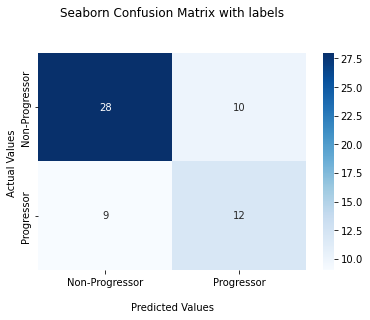

In [86]:
cf_matrix = confusion_matrix(y_test_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Progressor','Progressor'])
ax.yaxis.set_ticklabels(['Non-Progressor','Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m2_eval_test = model_121.evaluate(X_test, y_test)
plt.show()

**For validation set:**

In [87]:
pred = model_121.predict(X_val)
roc_value = roc_auc_score(y_val, pred)
ap_score = average_precision_score(y_val, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 6ms/step
roc auc score:  0.7142857142857143
average precision score:  0.6850876298984225


In [88]:
y_pred = pred
y_c = (y_pred > 0.5).astype("int32")
y_val_np = y_val.to_numpy()
y_val_np = y_val_np.astype('int32')

2/2 [==============================] - 0s 6ms/step - loss: 0.6212 - accuracy: 0.7358


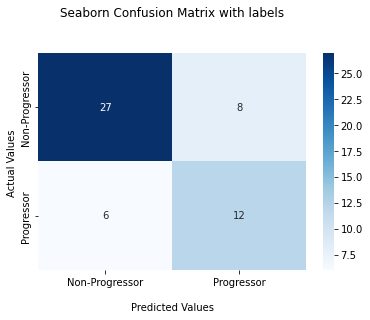

In [89]:
cf_matrix = confusion_matrix(y_val_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Progressor','Progressor'])
ax.yaxis.set_ticklabels(['Non-Progressor','Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m2_eval_test = model_121.evaluate(X_val, y_val)
plt.show()

#### 1.2.2 Alvin's model

In [90]:
#create model1
model_122 = Sequential()

#add layers
model_122.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(768,1)))
model_122.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model_122.add(Flatten())
model_122.add(Dense(112, activation='relu'))
model_122.add(Dense(2, activation='softmax'))
model_122.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_11 (Conv1D)          (None, 766, 64)           256       
                                                                 
 conv1d_12 (Conv1D)          (None, 764, 32)           6176      
                                                                 
 flatten_7 (Flatten)         (None, 24448)             0         
                                                                 
 dense_17 (Dense)            (None, 112)               2738288   
                                                                 
 dense_18 (Dense)            (None, 2)                 226       
                                                                 
Total params: 2,744,946
Trainable params: 2,744,946
Non-trainable params: 0
_________________________________________________________________


In [91]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=400,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
opt1 = keras.optimizers.Adam(learning_rate = 1e-4)

In [92]:
model_122.compile(optimizer=opt1, 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
#Here we use cross-entropy as the criteria for loss.
model_122.fit(X_train_over, y_train_over, 
            validation_data=(X_val, y_val), 
            epochs=500, verbose=True, 
            callbacks=[early_stopping_monitor])

Epoch 1/500
21/21 [==============================] - 1s 40ms/step - loss: 0.6936 - accuracy: 0.5202 - val_loss: 0.6738 - val_accuracy: 0.6604
Epoch 2/500
21/21 [==============================] - 1s 35ms/step - loss: 0.6880 - accuracy: 0.5000 - val_loss: 0.6592 - val_accuracy: 0.6604
Epoch 3/500
21/21 [==============================] - 1s 35ms/step - loss: 0.6838 - accuracy: 0.5296 - val_loss: 0.6713 - val_accuracy: 0.6981
Epoch 4/500
21/21 [==============================] - 1s 34ms/step - loss: 0.6806 - accuracy: 0.5732 - val_loss: 0.6330 - val_accuracy: 0.6604
Epoch 5/500
21/21 [==============================] - 1s 37ms/step - loss: 0.6696 - accuracy: 0.6012 - val_loss: 0.6690 - val_accuracy: 0.6604
Epoch 6/500
21/21 [==============================] - 1s 35ms/step - loss: 0.6624 - accuracy: 0.6246 - val_loss: 0.6276 - val_accuracy: 0.7170
Epoch 7/500
21/21 [==============================] - 1s 34ms/step - loss: 0.6525 - accuracy: 0.6355 - val_loss: 0.6967 - val_accuracy: 0.5660
Epoch 

21/21 [==============================] - 1s 35ms/step - loss: 0.3877 - accuracy: 0.8255 - val_loss: 0.8578 - val_accuracy: 0.5472
Epoch 59/500
21/21 [==============================] - 1s 36ms/step - loss: 0.3553 - accuracy: 0.8660 - val_loss: 0.8355 - val_accuracy: 0.6038
Epoch 60/500
21/21 [==============================] - 1s 35ms/step - loss: 0.3691 - accuracy: 0.8520 - val_loss: 0.8642 - val_accuracy: 0.5849
Epoch 61/500
21/21 [==============================] - 1s 34ms/step - loss: 0.3495 - accuracy: 0.8629 - val_loss: 0.8463 - val_accuracy: 0.6226
Epoch 62/500
21/21 [==============================] - 1s 37ms/step - loss: 0.3748 - accuracy: 0.8333 - val_loss: 0.8638 - val_accuracy: 0.6038
Epoch 63/500
21/21 [==============================] - 1s 35ms/step - loss: 0.3434 - accuracy: 0.8801 - val_loss: 0.8520 - val_accuracy: 0.6226
Epoch 64/500
21/21 [==============================] - 1s 34ms/step - loss: 0.3440 - accuracy: 0.8629 - val_loss: 0.9187 - val_accuracy: 0.5849
Epoch 65/500

21/21 [==============================] - 1s 32ms/step - loss: 0.1485 - accuracy: 0.9595 - val_loss: 1.2688 - val_accuracy: 0.5472
Epoch 116/500
21/21 [==============================] - 1s 33ms/step - loss: 0.1340 - accuracy: 0.9626 - val_loss: 1.2696 - val_accuracy: 0.5283
Epoch 117/500
21/21 [==============================] - 1s 37ms/step - loss: 0.1324 - accuracy: 0.9688 - val_loss: 1.3617 - val_accuracy: 0.5849
Epoch 118/500
21/21 [==============================] - 1s 31ms/step - loss: 0.1295 - accuracy: 0.9673 - val_loss: 1.3061 - val_accuracy: 0.5283
Epoch 119/500
21/21 [==============================] - 1s 31ms/step - loss: 0.1650 - accuracy: 0.9439 - val_loss: 1.3121 - val_accuracy: 0.5094
Epoch 120/500
21/21 [==============================] - 1s 30ms/step - loss: 0.1388 - accuracy: 0.9626 - val_loss: 1.3673 - val_accuracy: 0.5849
Epoch 121/500
21/21 [==============================] - 1s 32ms/step - loss: 0.1402 - accuracy: 0.9548 - val_loss: 1.4486 - val_accuracy: 0.5660
Epoch 

Epoch 172/500
21/21 [==============================] - 1s 33ms/step - loss: 0.0442 - accuracy: 0.9938 - val_loss: 1.7616 - val_accuracy: 0.5660
Epoch 173/500
21/21 [==============================] - 1s 33ms/step - loss: 0.0455 - accuracy: 0.9938 - val_loss: 1.9263 - val_accuracy: 0.5849
Epoch 174/500
21/21 [==============================] - 1s 32ms/step - loss: 0.2164 - accuracy: 0.9159 - val_loss: 1.8444 - val_accuracy: 0.6038
Epoch 175/500
21/21 [==============================] - 1s 32ms/step - loss: 0.0977 - accuracy: 0.9673 - val_loss: 1.6926 - val_accuracy: 0.6226
Epoch 176/500
21/21 [==============================] - 1s 32ms/step - loss: 0.0578 - accuracy: 0.9907 - val_loss: 1.7532 - val_accuracy: 0.5849
Epoch 177/500
21/21 [==============================] - 1s 33ms/step - loss: 0.0500 - accuracy: 0.9922 - val_loss: 1.7597 - val_accuracy: 0.5660
Epoch 178/500
21/21 [==============================] - 1s 33ms/step - loss: 0.0445 - accuracy: 0.9922 - val_loss: 1.7472 - val_accuracy:

Epoch 229/500
21/21 [==============================] - 1s 31ms/step - loss: 0.0171 - accuracy: 0.9984 - val_loss: 2.1446 - val_accuracy: 0.6038
Epoch 230/500
21/21 [==============================] - 1s 31ms/step - loss: 0.0179 - accuracy: 0.9969 - val_loss: 2.1366 - val_accuracy: 0.6038
Epoch 231/500
21/21 [==============================] - 1s 32ms/step - loss: 0.0159 - accuracy: 0.9984 - val_loss: 2.1173 - val_accuracy: 0.6038
Epoch 232/500
21/21 [==============================] - 1s 31ms/step - loss: 0.0155 - accuracy: 0.9984 - val_loss: 2.2039 - val_accuracy: 0.5849
Epoch 233/500
21/21 [==============================] - 1s 32ms/step - loss: 0.0188 - accuracy: 0.9953 - val_loss: 2.2233 - val_accuracy: 0.5849
Epoch 234/500
21/21 [==============================] - 1s 33ms/step - loss: 0.0161 - accuracy: 0.9969 - val_loss: 2.1660 - val_accuracy: 0.6415
Epoch 235/500
21/21 [==============================] - 1s 32ms/step - loss: 0.0160 - accuracy: 0.9984 - val_loss: 2.1720 - val_accuracy:

Epoch 286/500
21/21 [==============================] - 1s 36ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 2.6037 - val_accuracy: 0.6226
Epoch 287/500
21/21 [==============================] - 1s 38ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 2.6119 - val_accuracy: 0.6038
Epoch 288/500
21/21 [==============================] - 1s 38ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 2.6076 - val_accuracy: 0.6038
Epoch 289/500
21/21 [==============================] - 1s 36ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 2.6349 - val_accuracy: 0.6226
Epoch 290/500
21/21 [==============================] - 1s 34ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 2.6340 - val_accuracy: 0.6038
Epoch 291/500
21/21 [==============================] - 1s 32ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 2.6254 - val_accuracy: 0.6038
Epoch 292/500
21/21 [==============================] - 1s 36ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 2.6433 - val_accuracy:

Epoch 343/500
21/21 [==============================] - 1s 30ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.9382 - val_accuracy: 0.5849
Epoch 344/500
21/21 [==============================] - 1s 31ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.9293 - val_accuracy: 0.5849
Epoch 345/500
21/21 [==============================] - 1s 32ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.9693 - val_accuracy: 0.5849
Epoch 346/500
21/21 [==============================] - 1s 31ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.9568 - val_accuracy: 0.5849
Epoch 347/500
21/21 [==============================] - 1s 32ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.9322 - val_accuracy: 0.6038
Epoch 348/500
21/21 [==============================] - 1s 31ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.9591 - val_accuracy: 0.5849
Epoch 349/500
21/21 [==============================] - 1s 32ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 3.0039 - val_accuracy:

21/21 [==============================] - 1s 36ms/step - loss: 8.0325e-04 - accuracy: 1.0000 - val_loss: 3.2738 - val_accuracy: 0.6038
Epoch 400/500
21/21 [==============================] - 1s 38ms/step - loss: 7.8580e-04 - accuracy: 1.0000 - val_loss: 3.2649 - val_accuracy: 0.6038
Epoch 401/500
21/21 [==============================] - 1s 35ms/step - loss: 7.7435e-04 - accuracy: 1.0000 - val_loss: 3.2478 - val_accuracy: 0.6038
Epoch 402/500
21/21 [==============================] - 1s 35ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 3.2063 - val_accuracy: 0.6038
Epoch 403/500
21/21 [==============================] - 1s 35ms/step - loss: 7.8935e-04 - accuracy: 1.0000 - val_loss: 3.2662 - val_accuracy: 0.6038
Epoch 404/500
21/21 [==============================] - 1s 34ms/step - loss: 7.5161e-04 - accuracy: 1.0000 - val_loss: 3.2984 - val_accuracy: 0.6038
Epoch 405/500
21/21 [==============================] - 1s 35ms/step - loss: 7.6629e-04 - accuracy: 1.0000 - val_loss: 3.3083 - val

In [93]:
m1_eval_test = model_122.evaluate(X_test, y_test)
m1_eval_val = model_122.evaluate(X_val, y_val)

2/2 [==============================] - 0s 6ms/step - loss: 0.6276 - accuracy: 0.7170


**For test set:**

In [94]:
pred = model_122.predict(X_test)
roc_value = roc_auc_score(y_test, pred)
ap_score = average_precision_score(y_test, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 6ms/step
roc auc score:  0.7192982456140351
average precision score:  0.7275895804819803


In [95]:
y_pred = pred
y_c = (y_pred > 0.5).astype("int32")
y_test_np = y_test.to_numpy()
y_test_np = y_test_np.astype('int32')

2/2 [==============================] - 0s 10ms/step - loss: 0.6217 - accuracy: 0.7119


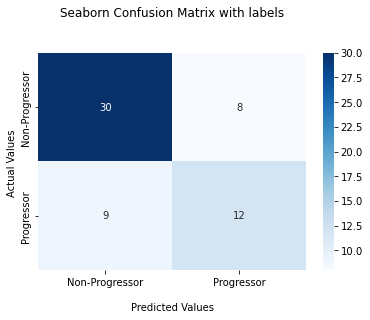

In [96]:
cf_matrix = confusion_matrix(y_test_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Progressor','Progressor'])
ax.yaxis.set_ticklabels(['Non-Progressor','Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m1_eval_test = model_122.evaluate(X_test, y_test)
plt.show()

**For validation set:**

In [97]:
pred = model_122.predict(X_val)
roc_value = roc_auc_score(y_val, pred)
ap_score = average_precision_score(y_val, pred)
print('roc auc score: ', roc_value)
print('average precision score: ', ap_score)

2/2 [==============================] - 0s 8ms/step
roc auc score:  0.7142857142857142
average precision score:  0.6830003635506698


In [98]:
y_pred = pred
y_c = (y_pred > 0.5).astype("int32")
y_val_np = y_val.to_numpy()
y_val_np = y_val_np.astype('int32')

2/2 [==============================] - 0s 9ms/step - loss: 0.6276 - accuracy: 0.7170


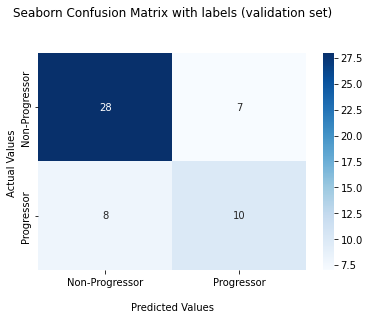

In [99]:
cf_matrix = confusion_matrix(y_val_np.argmax(axis=1), y_c.argmax(axis=1)) 
#cf_matrix = confusion_matrix(y_test_np[:, 1], y_c[:, 1]) 

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels (validation set)\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Progressor','Progressor'])
ax.yaxis.set_ticklabels(['Non-Progressor','Progressor'])

## Display the visualization of the Confusion Matrix.
plt.savefig('M1_GRI_test.png')
m1_eval_test = model_122.evaluate(X_val, y_val)
plt.show()

**Model saving:**

In [100]:
# serialize model to JSON
model_121_json = model_121.to_json()
with open("model_121.json", "w") as json_file:
    json_file.write(model_121_json)
# serialize weights to HDF5
model_121.save_weights("model_121.h5")
print("Saved model to disk")

Saved model to disk


In [101]:
# serialize model to JSON
model_122_json = model_122.to_json()
with open("model_122.json", "w") as json_file:
    json_file.write(model_122_json)
# serialize weights to HDF5
model_122.save_weights("model_122.h5")
print("Saved model to disk")

Saved model to disk
